In [1]:
import numpy as np, healpy as hp, pickle, curvedsky as cs, local, tools_cmb, binning as bn, plottools as pl
from matplotlib.pyplot import *

/global/homes/t/toshiyan/Work/Lib/actlib/actsims/actsims/noise.py:9: UserWarning: No pyfftw found. Using much slower numpy fft engine.
  if 'fftw' not in pfft.engine: warnings.warn("No pyfftw found. Using much slower numpy fft engine.")


In [3]:
#qids = ['boss_d02','boss_02']
#qids = ['s16_d02','s16_d03']
#qids_d = ['boss_d01','boss_d02','boss_d03','boss_d04','s16_d01','s16_d02','s16_d03']
qids_d = ['boss_d01','boss_d02','boss_d03','boss_d04']
qids_n = ['boss_01','boss_02','boss_03','boss_04']
qid_dn = ['comb_d','comb_n']
#qids = qid_dn + ['diff_dn','comb_dn']
qids = qid_dn + ['diff_dn']

In [4]:
aobj = {q: local.init_analysis_params(qid=q,ascale=5.) for q in qids}

In [5]:
mcl = {q: (np.loadtxt(aobj[q].fscl['c'])).T[1]*local.Tcmb**2 for q in qids}
ncl = {q: (np.loadtxt(aobj[q].fscl['n'])).T[1]*local.Tcmb**2 for q in qids}
ocl = {q: (np.loadtxt(aobj[q].fcls['c'][0])).T[1]*local.Tcmb**2 for q in qids}

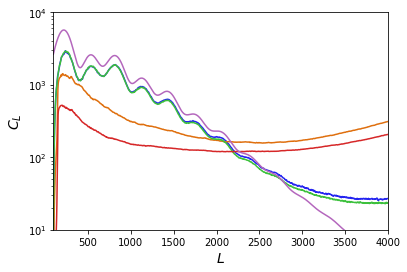

In [6]:
for q in qid_dn:
    pl.plot_1dstyle(ylog=True,ymin=1e1,ymax=1e4,xmin=100,xmax=4000)
    l = aobj[q].l
    s = l**2/np.pi/2.
    plot(l,s*(mcl[q]-ncl[q]))
    plot(l,s*ncl[q])
    #plot(l,s*ocl[q]/w2)
#plot(l,s*(ocl['comb_n']-ocl['comb_d']))
plot(l,s*aobj[q].lcl[0,:]*local.Tcmb**2)

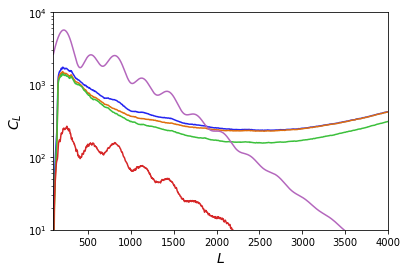

In [7]:
pl.plot_1dstyle(ylog=True,ymin=1e1,ymax=1e4,xmin=100,xmax=4000)
l = aobj['diff_dn'].l
s = l**2/np.pi/2.
w2 = 0.01
plot(l,s*mcl['diff_dn']/w2)
plot(l,s*ncl['diff_dn']/w2)
plot(l,s*ncl['comb_d'])
plot(l,s*(mcl['diff_dn']-ncl['diff_dn'])/w2)
#plot(l,s*ocl['diff_dn'])
plot(l,s*aobj['diff_dn'].lcl[0,:]*local.Tcmb**2)

#### Each Diff Map

In [8]:
dqids = [1,2,3,4]
#w2 = 0.016
w2 = 0.009
#dqids = [1]
aobj_d = {q: local.init_analysis_params(qid='diff_boss_0'+str(q)+'',ascale=5.0) for q in dqids}
mcl_d = {q: (np.loadtxt(aobj_d[q].fcls['c'][10])).T[1]*local.Tcmb**2/w2 for q in dqids}
ncl_d = {q: (np.loadtxt(aobj_d[q].fcls['n'][10])).T[1]*local.Tcmb**2/w2 for q in dqids}
ocl_d = {q: (np.loadtxt(aobj_d[q].fcls['c'][0])).T[1]*local.Tcmb**2/w2 for q in dqids}

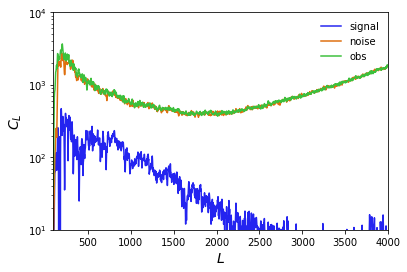

In [9]:
pl.plot_1dstyle(ylog=True,ymin=1e1,ymax=1e4,xmin=100,xmax=4000)
l = aobj_d[1].l
s = l**2/np.pi/2.
plot(l,s*(mcl_d[3]-ncl_d[3]),label='signal')
plot(l,s*mcl_d[3],label='noise')
plot(l,s*ocl_d[3],label='obs')
legend()

#### Check obs - sim

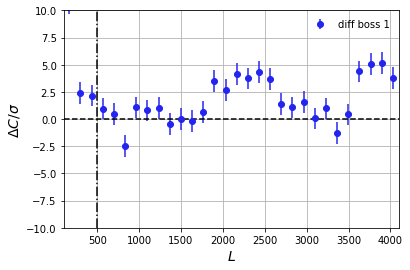

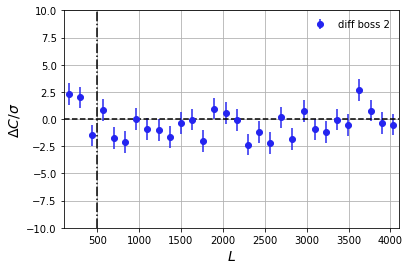

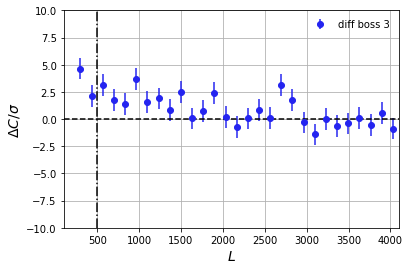

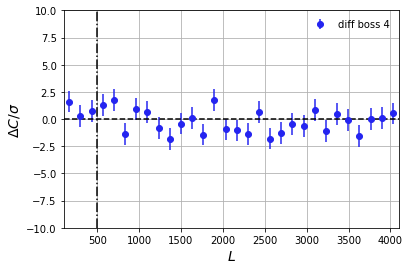

In [19]:
mb = bn.multipole_binning(30,lmin=100,lmax=4096)
s = mb.bc**3.5
for i in dqids:
    pl.plot_1dstyle(grid=True,xmin=100,xmax=4096,ymin=-10,ymax=10,ylab=r'$\Delta C/\sigma$')
    mcb, vcb, scb, ocb = bn.binned_spec(mb,aobj_d[i].fcls['c'][:101],cn=1)
    errorbar(mb.bc,(ocb-mcb)/vcb,yerr=vcb/vcb,fmt='o',label='diff boss '+str(i))
    axhline(0.,ls='--',color='k')
    axvline(500,ls='-.',color='k')
    legend()
    show()

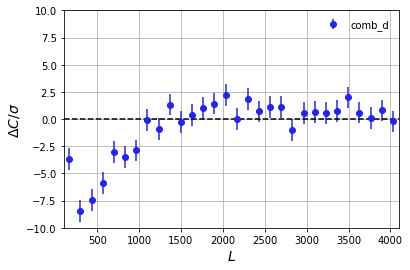

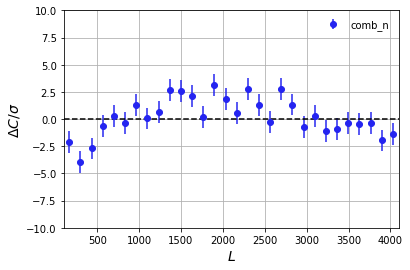

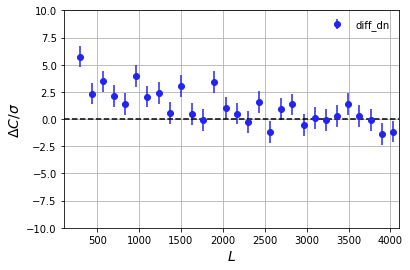

In [20]:
for q in qids:
    pl.plot_1dstyle(grid=True,xmin=100,xmax=4096,ymin=-10,ymax=10,ylab=r'$\Delta C/\sigma$')
    mcb, vcb, scb, ocb = bn.binned_spec(mb,aobj[q].fcls['c'][:101],cn=1)
    errorbar(mb.bc,(ocb-mcb)/vcb,yerr=vcb/vcb,fmt='o',label=q)
    axhline(0.,ls='--',color='k')
    legend()
    show()

#### All boss combined map

KeyError: 'comb_dn'

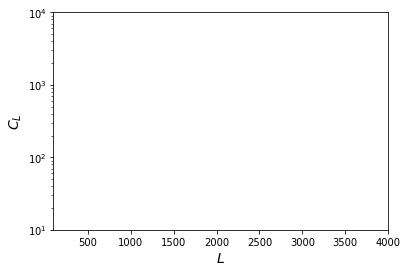

In [12]:
pl.plot_1dstyle(ylog=True,ymin=1e1,ymax=1e4,xmin=100,xmax=4000)
l = aobj['comb_dn'].l
s = l**2/np.pi/2.
plot(l,s*(mcl['comb_dn']-ncl['comb_dn']),label='signal')
plot(l,s*ncl['comb_dn'],label='noise')
plot(l,s*aobj['comb_dn'].lcl[0,:]*local.Tcmb**2)
legend()